In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime



In [13]:
# Set styling for better visualizations
plt.style.use('seaborn-v0_8')  # Updated to use valid style name
sns.set_palette("husl")

# Load the cleaned data
df = pd.read_csv('/Users/danielharrod/Company_Merger/Data/acquisitions_cleaned.csv')

# Convert Acquisition Date back to datetime
df['Acquisition Date'] = pd.to_datetime(df['Acquisition Date'])

# Display the first few rows of the dataset
df.head()

,ID,Parent Company,Acquired Company,Business,Acquisition Date
0,1,Apple,Network Innovations,Software,1988-03-01
1,2,Apple,Orion Network Systems,Computer Software,1988-06-01
2,3,Apple,Styleware,Computer software,1988-06-01
3,4,Apple,Nashoba Systems,Computer software,1988-07-01
4,5,Apple,Coral Software,Computer software,1989-01-01


# Temporal Analysis

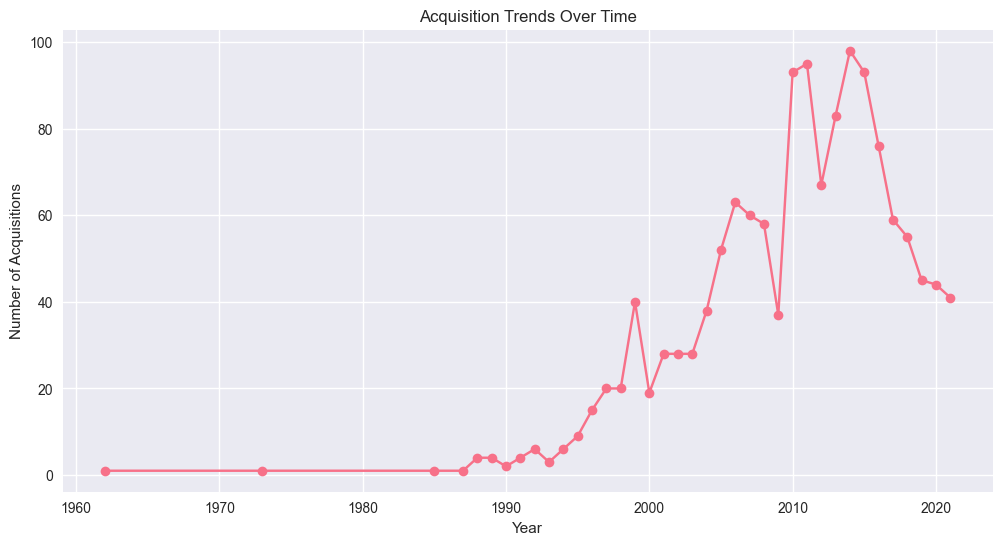

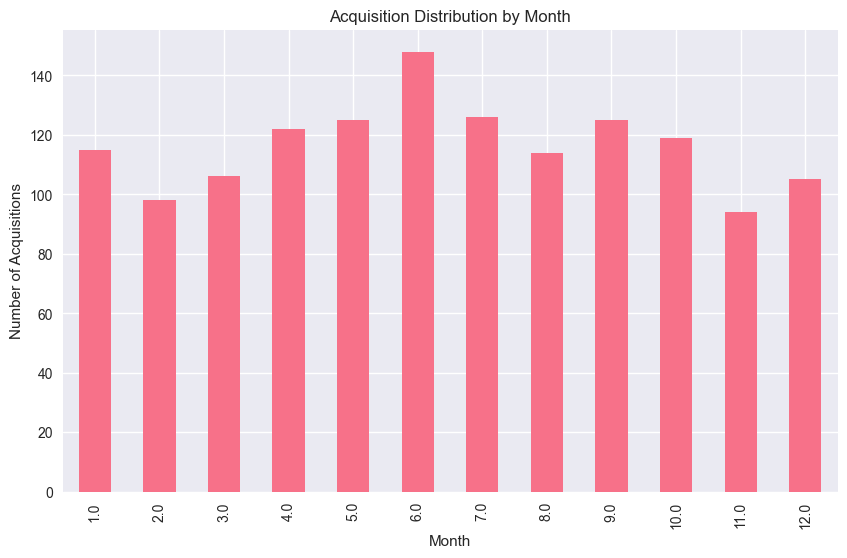

In [14]:
# Create yearly acquisition counts
yearly_acquisitions = df.groupby(df['Acquisition Date'].dt.year).size()

# Plot yearly trends
plt.figure(figsize=(12, 6))
yearly_acquisitions.plot(kind='line', marker='o')
plt.title('Acquisition Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Acquisitions')
plt.grid(True)
plt.show()

# Monthly patterns
monthly_pattern = df.groupby(df['Acquisition Date'].dt.month).size()
plt.figure(figsize=(10, 6))
monthly_pattern.plot(kind='bar')
plt.title('Acquisition Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Acquisitions')
plt.show()

# Parent Company Analysis

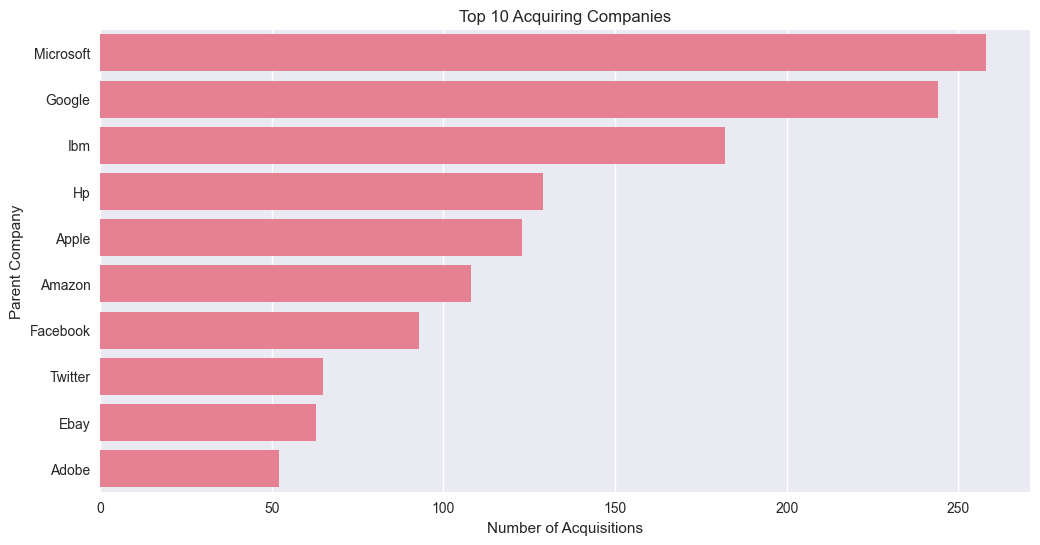

In [17]:
# Top acquiring companies
top_acquirers = df['Parent Company'].value_counts().head(10)

# Create a bar plot of top acquirers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_acquirers.values, y=top_acquirers.index)
plt.title('Top 10 Acquiring Companies')
plt.xlabel('Number of Acquisitions')
# save the figure 
plt.savefig('/Users/danielharrod/Company_Merger/Figures/top_acquirers.png', 
            bbox_inches='tight',
            dpi=300,
            format='png')
plt.show()

# Acquisition timeline for top 5 companies
top_5_companies = df[df['Parent Company'].isin(top_acquirers.head().index)]
fig = px.scatter(top_5_companies, 
                x='Acquisition Date', 
                y='Parent Company',
                title='Acquisition Timeline for Top 5 Companies')
# save the figure 
fig.write_html("/Users/danielharrod/Company_Merger/Figures/acquisition_timeline.html")
fig.show()

# Business Sector Analysis

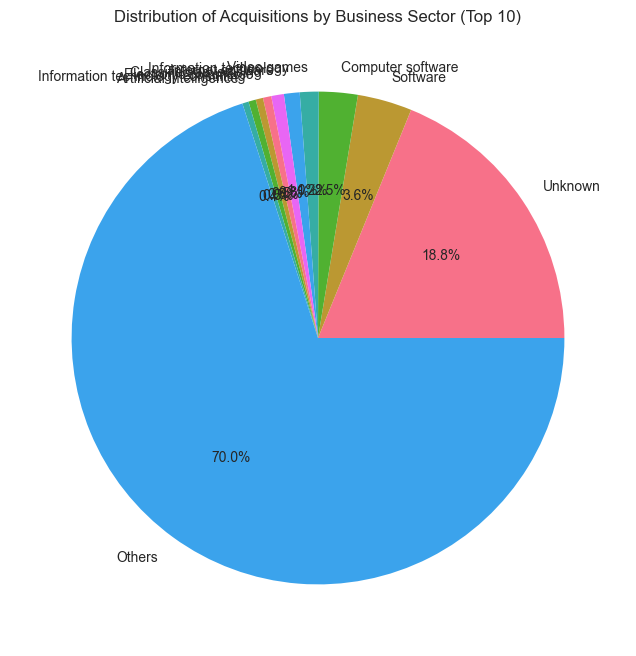

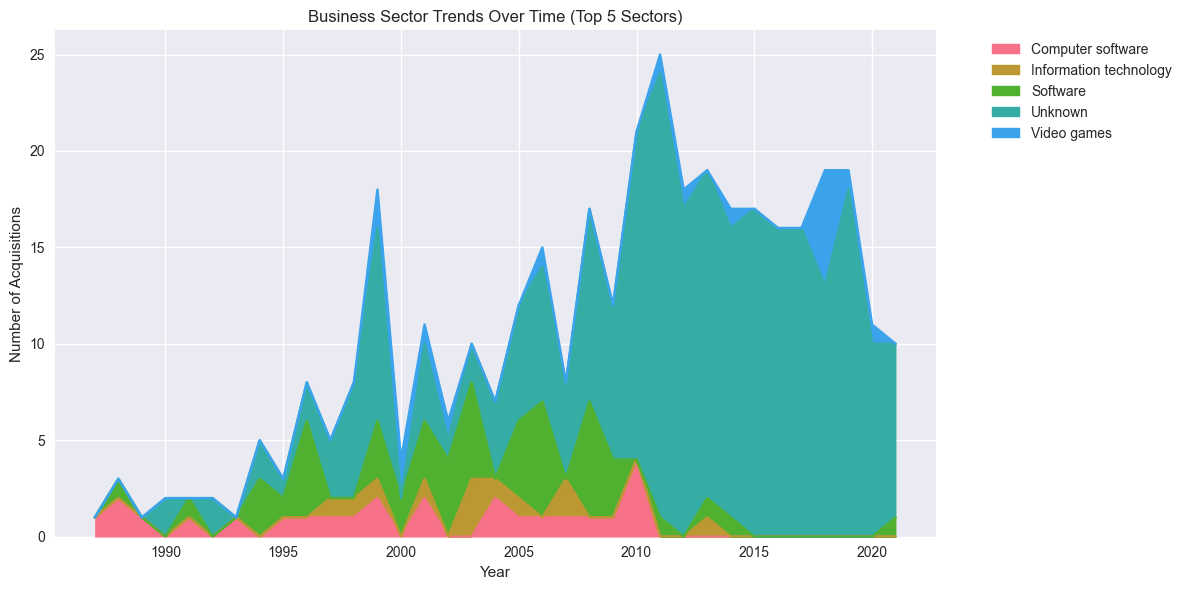

In [16]:
# Business sector distribution
# Get top 10 sectors and group others
business_distribution = df['Business'].value_counts()
top_10_business = business_distribution.head(10)
others = pd.Series({'Others': business_distribution[10:].sum()})
business_distribution_grouped = pd.concat([top_10_business, others])

# Create a pie chart of business sectors
plt.figure(figsize=(12, 8))
plt.pie(business_distribution_grouped.values, 
        labels=business_distribution_grouped.index, 
        autopct='%1.1f%%')
# save the figure 
plt.savefig('/Users/danielharrod/Company_Merger/Figures/business_sectors_pie.png', 
            bbox_inches='tight',
            dpi=300,
            format='png')
plt.title('Distribution of Acquisitions by Business Sector (Top 10)')
plt.show()

# Business sector trends over time
# Get top 5 sectors for trend analysis
top_5_sectors = business_distribution.head(5).index
df_top_sectors = df[df['Business'].isin(top_5_sectors)]

pivot_business = df_top_sectors.pivot_table(
    index=df_top_sectors['Acquisition Date'].dt.year,
    columns='Business',
    aggfunc='size',
    fill_value=0
)

# Plot stacked area chart
pivot_business.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Business Sector Trends Over Time (Top 5 Sectors)')
plt.xlabel('Year')
plt.ylabel('Number of Acquisitions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# save the figure 
plt.savefig('/Users/danielharrod/Company_Merger/Figures/business_sectors_trends.png', 
            bbox_inches='tight',
            dpi=300,
            format='png')
plt.show()

# Network Analysis

In [10]:
# Create a simple network analysis of parent-acquired relationships
import networkx as nx

# Create a graph of acquisitions
G = nx.from_pandas_edgelist(df, 
                           source='Parent Company',
                           target='Acquired Company')

# Calculate key network metrics
print("Network Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nTop 5 companies by degree centrality:")
degree_cent = nx.degree_centrality(G)
top_central = dict(sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5])
for company, centrality in top_central.items():
    print(f"{company}: {centrality:.4f}")

Network Statistics:
Number of nodes: 1466
Number of edges: 1453

Top 5 companies by degree centrality:
Microsoft: 0.1761
Google: 0.1666
Ibm: 0.1242
Hp: 0.0881
Apple: 0.0840


# Statsic Analysis


In [11]:
#Calculate acquisition frequencies
acquisition_freq = df.groupby('Parent Company').size()

print("Acquisition Statistics:")
print(f"Mean acquisitions per company: {acquisition_freq.mean():.2f}")
print(f"Median acquisitions per company: {acquisition_freq.median():.2f}")
print(f"Standard deviation: {acquisition_freq.std():.2f}")
print(f"\nCompanies with single acquisition: {(acquisition_freq == 1).sum()}")
print(f"Companies with multiple acquisitions: {(acquisition_freq > 1).sum()}")

Acquisition Statistics:
Mean acquisitions per company: 103.93
Median acquisitions per company: 79.00
Standard deviation: 76.61

Companies with single acquisition: 0
Companies with multiple acquisitions: 14
